## Spline interpolaition 1D test 

In [1]:
import importlib
import sys

from torch_spline_interpolation import *

importlib.reload(sys.modules['torch_spline_interpolation'])
from torch_spline_interpolation import *

t_sci.shape=(14,)
t_torch.shape=(20,)
Adding batch and/or channel dimension dimension...
Adding batch and/or channel dimension dimension...
Adding batch and/or channel dimension dimension...
Z_interp.shape=torch.Size([1, 1, 1, 200])
Bx.shape=torch.Size([16, 16])
Bx_knots_sci.shape=torch.Size([16, 10])
Bx_scipy.shape=(16, 10)
Knot difference: [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
 -4.4408921e-16  0.0000000e+00 -8.8817842e-16  0.0000000e+00
  0.0000000e+00 -8.8817842e-16  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00]


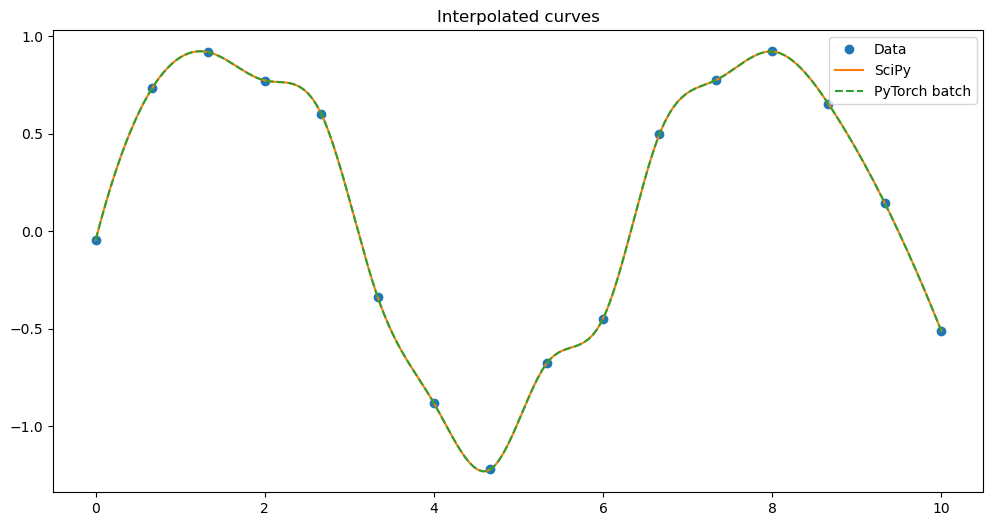

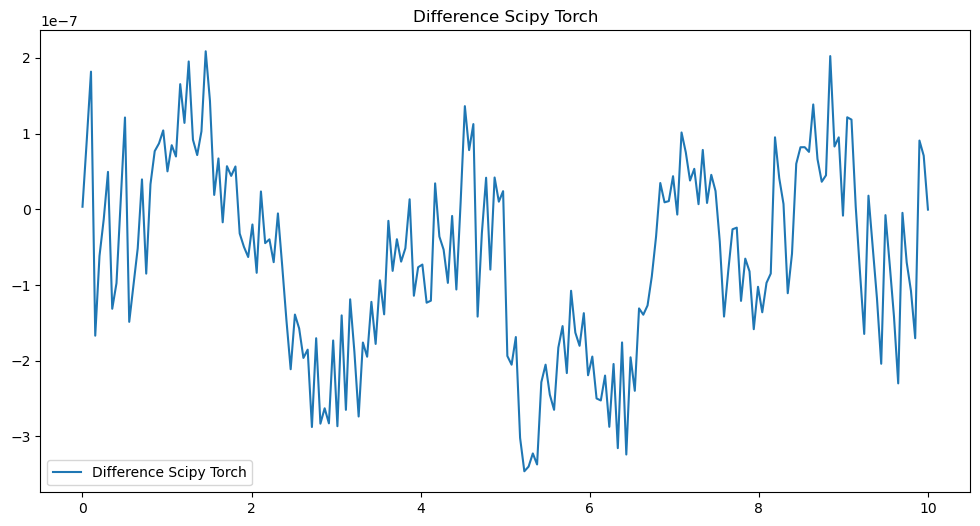

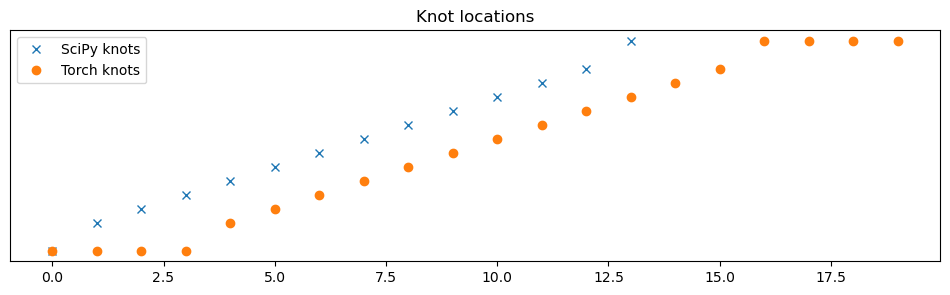

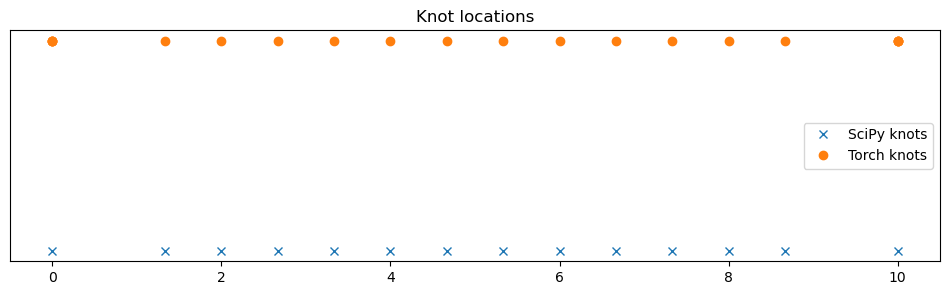

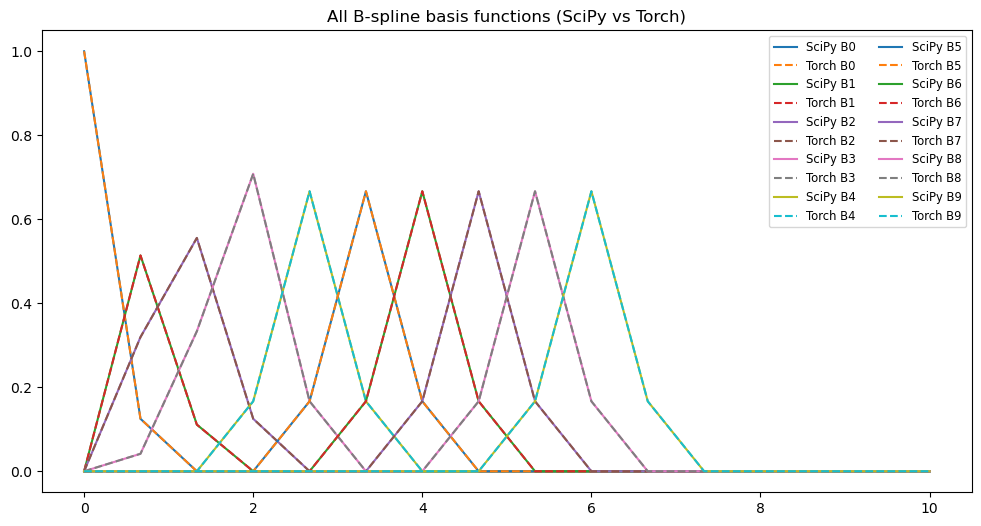

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline, BSpline
# Assume your class is imported as SplineInterpolate1D_batch

# Sample data
x = np.linspace(0, 10, 16)
y = np.sin(x) + 0.1 * np.random.randn(len(x))
k=3

# SciPy spline (cubic interpolation)
sci = InterpolatedUnivariateSpline(x, y, k=k)





# PyTorch batched version (single data series in batch)
#model = SplineInterpolate1D_batch(num_x_bins=200, kx=k, s=1e-8, device='cpu')
model=SplineInterpolate1D(num_x_bins=200, kx=k, s=0)
#Z = [torch.tensor(y, dtype=torch.float).unsqueeze(0).unsqueeze(0),torch.tensor(y, dtype=torch.float).unsqueeze(0).unsqueeze(0)]
Z = torch.tensor(y, dtype=torch.float)

#generate knots
t_sci = sci.get_knots()
t_torch = model.generate_fitpack_knots(torch.tensor(x), k).numpy()

print(f'{t_sci.shape=}')
print(f'{t_torch.shape=}')


#Z_out = model(Z, xmin=0, xmax=10)  # returns shape (1,1,1,200)
Z_out = model(Z)  # returns shape (1,1,1,200)

x_eval = np.linspace(0, 10, 200)
#y_torch = Z_out.squeeze().detach().numpy()[0]
y_torch = Z_out.squeeze().detach().numpy()



# Bspline functions:
#Bx = model.bspline_basis_natural_torch_gamma(torch.tensor(x,dtype=torch.float64).unsqueeze(0), model.kx, torch.tensor(t_torch,dtype=torch.float64).unsqueeze(0))
Bx = model.bspline_basis_natural_torch(torch.tensor(x,dtype=torch.float64), model.kx, torch.tensor(t_torch,dtype=torch.float64))

#Bx_knots_sci = model.bspline_basis_natural_torch_gamma(torch.tensor(x,dtype=torch.float64).unsqueeze(0), model.kx, torch.tensor(t_sci,dtype=torch.float64).unsqueeze(0))
Bx_knots_sci = model.bspline_basis_natural_torch(torch.tensor(x,dtype=torch.float64), model.kx, torch.tensor(t_sci,dtype=torch.float64))

print(f'{Bx.shape=}')
print(f'{Bx_knots_sci.shape=}')



def extract_scipy_basis(x_eval, knots, k):
    """Construct basis matrix for univariate B-splines using SciPy."""
    n_basis = len(knots) - k - 1
    B = np.zeros((len(x_eval), n_basis))
    for i in range(n_basis):
        coeffs = np.zeros(n_basis)
        coeffs[i] = 1.0
        spline = BSpline(knots, coeffs, k, extrapolate=False)
        B[:, i] = spline(x_eval)
    return B

Bx_scipy = extract_scipy_basis(x, t_sci, k)
Bx_scipy_torch = extract_scipy_basis(x, t_torch, k)

print(f'{Bx_scipy.shape=}')


# Plot interpolation
plt.figure(figsize=(12, 6))
plt.plot(x, y, 'o', label='Data')
plt.plot(x_eval, sci(x_eval),  label='SciPy')
plt.plot(x_eval, y_torch, '--', label='PyTorch batch')
plt.legend()
plt.title('Interpolated curves')


# Plot interpolation
plt.figure(figsize=(12, 6))
#plt.plot(x, y, 'o', label='Data')
plt.plot(x_eval, sci(x_eval)- y_torch , label='Difference Scipy Torch')
#plt.plot(x_eval, y_torch, '-.', label='PyTorch batch')
plt.legend()
plt.title('Difference Scipy Torch')

# Plot knots
plt.figure(figsize=(12, 3))
# SciPy internal knots
plt.plot(t_sci, 'x', label='SciPy knots')
# Torch knot generation
plt.plot(t_torch, 'o', label='Torch knots')
plt.yticks([])
plt.legend()
plt.title('Knot locations')


# Plot knots
plt.figure(figsize=(12, 3))
# SciPy internal knots
plt.plot(t_sci, np.zeros_like(t_sci), 'x', label='SciPy knots')
# Torch knot generation
plt.plot(t_torch, np.zeros_like(t_torch)+0.1, 'o', label='Torch knots')
plt.yticks([])
plt.legend()
plt.title('Knot locations')

print(f'Knot difference: {t_sci-t_torch[3:3+t_sci.shape[-1]]}')
#print(f'Knot difference: {t_sci-t_torch}')

# Plot basis functions (first 6)
plt.figure(figsize=(12, 6))
n_basis = Bx_scipy.shape[1]
for i in range(n_basis):
    plt.plot(x, Bx_scipy_torch[:, i], label=f'SciPy B{i}')
    plt.plot(x, Bx[:, i], '--', label=f'Torch B{i}')
    
plt.legend(ncol=2, fontsize='small')
#plt.ylim(0,1)
plt.title('All B‑spline basis functions (SciPy vs Torch)')
plt.show()


## Spline interpolation 2D test

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline
import torch
from torch_spline_interpolation import SplineInterpolate2D,SplineInterpolate1D



In [4]:
import importlib
import sys
importlib.reload(sys.modules['torch_spline_interpolation'])
from torch_spline_interpolation import SplineInterpolate2D, SplineInterpolate1D

In [5]:
# 1. Create toy data
nx, ny = 16, 32
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
X, Y = np.meshgrid(x, y, indexing='ij')
Z = np.sin(3 * np.pi * X+0.25*np.pi) * np.cos(3 * np.pi * Y+0.25*np.pi)
print(Z.shape)
kx=3
ky=3
x_torch = torch.tensor(x, dtype=torch.float64)
y_torch = torch.tensor(y, dtype=torch.float64)
upsample = 4
x_up = np.linspace(0, 1, nx * upsample)
y_up = np.linspace(0, 1, ny * upsample)
X_up, Y_up = np.meshgrid(x_up, y_up, indexing='ij') 

(16, 32)


In [6]:
# 2. Fit SciPy vs. your PyTorch model
sci = RectBivariateSpline(x, y, Z, kx=3, ky=3)
#Zp = sci.ev(X.ravel(), Y.ravel()).reshape(X.shape)
Zp = sci.ev(X_up.ravel(), Y_up.ravel()).reshape(X_up.shape)

# 3. Extract SciPy knots & coefficients
tx, ty = sci.get_knots()

In [7]:
# 4. Fitpack-style node placement
def fitpack_node_placement(x: torch.Tensor, k: int) -> torch.Tensor:
    """
    Compute knots placement like FITPACK for spline degree k, given data points x.
    x: 1D tensor of increasing data points, length n
    Returns knot vector of length n + k + 1
    """
    if x.ndim == 1:
        x = x.unsqueeze(0)  # batch dim

    B, n = x.shape
    if n < k + 1:
        raise ValueError(f"Need at least {k + 1} points for degree k={k}.")

    # Number of knots
    m = n + k + 1

    # Boundary knots: repeat boundary points k+1 times
    left = x[:, 0:1].expand(B, k+1)
    right = x[:, -1:].expand(B, k+1)

    # Interior knots: average of k consecutive points **starting at i+1**
    # Number of interior knots = m - 2*(k+1) = n - k - 1
    # i ranges from 0 to n-k-2 (total n-k-1 knots)
    interior_knots = torch.stack(
        [x[:, i+1:i + k + 1].mean(dim=1) for i in range(n - k - 1)],
        dim=1
    ) if (n - k - 1) > 0 else torch.empty(B, 0, device=x.device, dtype=x.dtype)

    # Concatenate all knots
    knots = torch.cat([left, interior_knots, right], dim=1)

    # Remove batch dim if originally 1D
    return knots.squeeze(0) if knots.shape[0] == 1 else knots



In [8]:
# 5. Run your PyTorch version
model = SplineInterpolate2D(num_t_bins=nx, num_f_bins=ny, kx=3, ky=3,)
Z_tensor = torch.tensor(Z[None, None, :, :], dtype=torch.float32)
Z_tensor = torch.cat([Z_tensor,Z_tensor],dim=1)
Z_tensor = torch.cat([Z_tensor,Z_tensor],dim=0)

print(f'{Z_tensor.shape=}')
#Zt = model(Z_tensor)[0, 0].detach().numpy().T
x_out_torch = torch.tensor(x_up, dtype=torch.float64)
y_out_torch = torch.tensor(y_up, dtype=torch.float64)

with torch.no_grad():
    Zt = model(Z_tensor, xin=x_torch, yin=y_torch, xout=x_out_torch, yout=y_out_torch)[0, 0].cpu().numpy().T

print(f'{Zt.shape=}')
# 5. Generate knots manually

#tx_fitpack = fitpack_node_placement(x_torch, kx)
#ty_fitpack = fitpack_node_placement(y_torch, ky)

tx_torch = model.generate_fitpack_knots(x_torch, model.kx)
ty_torch = model.generate_fitpack_knots(y_torch, model.ky)

#tx_torch = model.generate_natural_knots(x_torch, model.kx)
#ty_torch = model.generate_natural_knots(y_torch, model.ky)


Bx = model.bspline_basis_natural_torch(torch.tensor(x), model.kx, torch.tensor(tx_torch,dtype=torch.float64))
By = model.bspline_basis_natural_torch(torch.tensor(y), model.ky, torch.tensor(ty_torch,dtype=torch.float64))

Bx_knots_sci = model.bspline_basis_natural_torch(torch.tensor(x), model.kx, torch.tensor(tx,dtype=torch.float64))
By_knots_sci = model.bspline_basis_natural_torch(torch.tensor(y), model.ky, torch.tensor(ty,dtype=torch.float64))


Z_tensor.shape=torch.Size([2, 2, 16, 32])
tx.dtype=torch.float64
ty.dtype=torch.float64
Bx.dtype=torch.float64
By.dtype=torch.float64
z.dtype=torch.float64
x.dtype=torch.float64
y.dtype=torch.float64
Zt.shape=(64, 128)


/tmp/ipykernel_221/2189161262.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Bx = model.bspline_basis_natural_torch(torch.tensor(x), model.kx, torch.tensor(tx_torch,dtype=torch.float64))
/tmp/ipykernel_221/2189161262.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  By = model.bspline_basis_natural_torch(torch.tensor(y), model.ky, torch.tensor(ty_torch,dtype=torch.float64))


In [9]:
# 6. Approximate SciPy basis matrices
from scipy.interpolate import BSpline

def extract_scipy_basis(x_eval, knots, k, axis='x'):
    """Construct basis matrix for univariate B-splines using SciPy."""
    n_basis = len(knots) - k - 1
    B = np.zeros((len(x_eval), n_basis))
    for i in range(n_basis):
        coeffs = np.zeros(n_basis)
        coeffs[i] = 1.0
        spline = BSpline(knots, coeffs, k, extrapolate=False)
        B[:, i] = spline(x_eval)
    return B

Bx_sci = extract_scipy_basis(x, tx, 3, axis='x')
By_sci = extract_scipy_basis(y, ty, 3, axis='y')

Bx_sci_knots_torch = extract_scipy_basis(x, tx_torch, 3, axis='x')
By_sci_knots_torch = extract_scipy_basis(y, ty_torch, 3, axis='y')

In [13]:
# 7. Print comparison summary
#print("Max absolute difference:", np.max(np.abs(Zp - Zt)))
print("SciPy tx:", tx)
print("Torch tx:", tx_torch)
print("Torch tx Scipy tx difference:", np.abs(tx_torch-tx))

SciPy tx: [0.         0.         0.         0.         0.13333333 0.2
 0.26666667 0.33333333 0.4        0.46666667 0.53333333 0.6
 0.66666667 0.73333333 0.8        0.86666667 1.         1.
 1.         1.        ]
Torch tx: tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.1333, 0.2000, 0.2667, 0.3333, 0.4000,
        0.4667, 0.5333, 0.6000, 0.6667, 0.7333, 0.8000, 0.8667, 1.0000, 1.0000,
        1.0000, 1.0000], dtype=torch.float64)
Torch tx Scipy tx difference: tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.7756e-17,
        0.0000e+00, 0.0000e+00, 5.5511e-17, 5.5511e-17, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.1102e-16, 1.1102e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00], dtype=torch.float64)


In [11]:
# 7. Print comparison summary
print("Max absolute difference:", np.max(np.abs(Zp - Zt)))
print("SciPy tx shape:", tx.shape)
print("Torch tx shape:", tx_torch.shape)
#print("Torch tx fitpack shape:", tx_fitpack.shape)

Max absolute difference: 4.00599147187819e-08
SciPy tx shape: (20,)
Torch tx shape: torch.Size([20])


### Plots

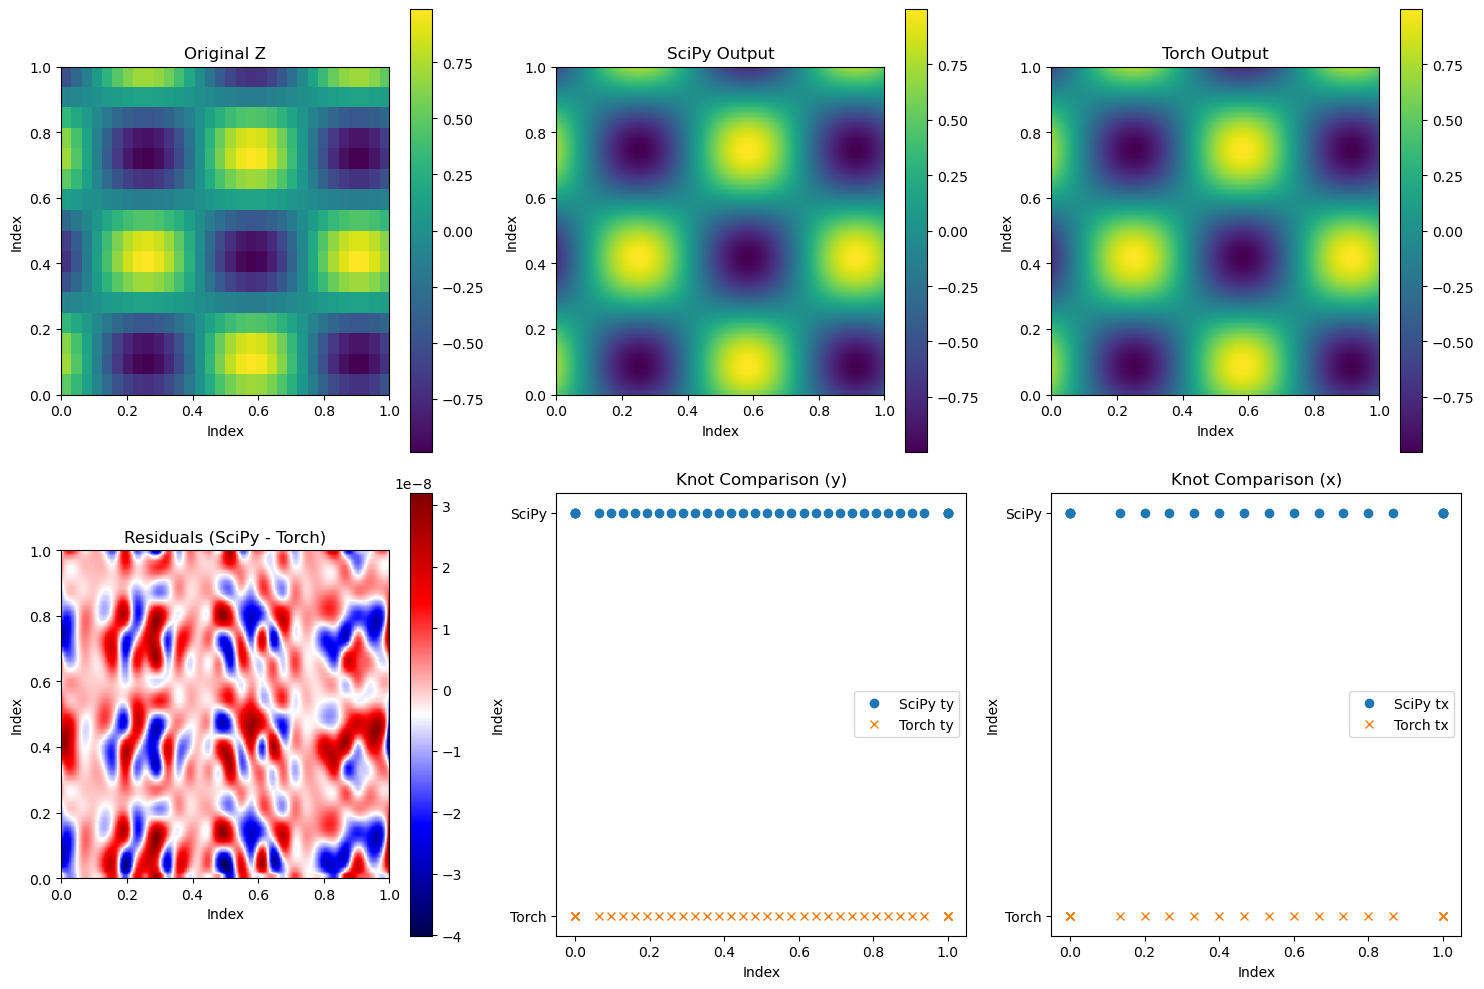

In [14]:
# 7. Plotting
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Z comparisons
z0=axs[0, 0].imshow(Z, extent=(y.min(), y.max(), x.min(), x.max()), origin='lower')
axs[0, 0].set_title('Original Z')
fig.colorbar(z0, ax=axs[0, 0])

z1=axs[0, 1].imshow(Zp, extent=(y.min(), y.max(), x.min(), x.max()), origin='lower')
axs[0, 1].set_title('SciPy Output')
fig.colorbar(z1, ax=axs[0, 1])

z2=axs[0, 2].imshow(Zt, extent=(y.min(), y.max(), x.min(), x.max()), origin='lower')
axs[0, 2].set_title('Torch Output')
fig.colorbar(z2, ax=axs[0, 2])

# Residual
im = axs[1, 0].imshow(Zp - Zt, cmap='seismic', extent=(y.min(), y.max(), x.min(), x.max()), origin='lower')
axs[1, 0].set_title('Residuals (SciPy - Torch)')
fig.colorbar(im, ax=axs[1, 0])


# Knot positions comparison

axs[1, 1].plot(ty, np.ones_like(ty), 'o', label='SciPy ty')
axs[1, 1].plot(ty_torch.numpy(), np.zeros_like(ty_torch), 'x', label='Torch ty')
#axs[1, 1].plot(ty_fitpack.numpy(),0.5*np.ones_like(ty_fitpack), '+', label='Torch refined knots ty')
axs[1, 1].set_yticks([0, 1])
axs[1, 1].set_yticklabels(['Torch', 'SciPy'])
axs[1, 1].set_title('Knot Comparison (y)')
axs[1, 1].legend()

axs[1, 2].plot(tx, np.ones_like(tx), 'o', label='SciPy tx')
axs[1, 2].plot(tx_torch.numpy(), np.zeros_like(tx_torch), 'x', label='Torch tx')
#axs[1, 2].plot(tx_fitpack.numpy(),0.5*np.ones_like(tx_fitpack), '+', label='Torch refined knots ty')
axs[1, 2].set_yticks([0, 1])
axs[1, 2].set_yticklabels(['Torch', 'SciPy'])
axs[1, 2].set_title('Knot Comparison (x)')
axs[1, 2].legend()

# Axis labels
for ax in axs.flat:
    ax.set_xlabel('Index')
    ax.set_ylabel('Index')

plt.tight_layout()
plt.show()

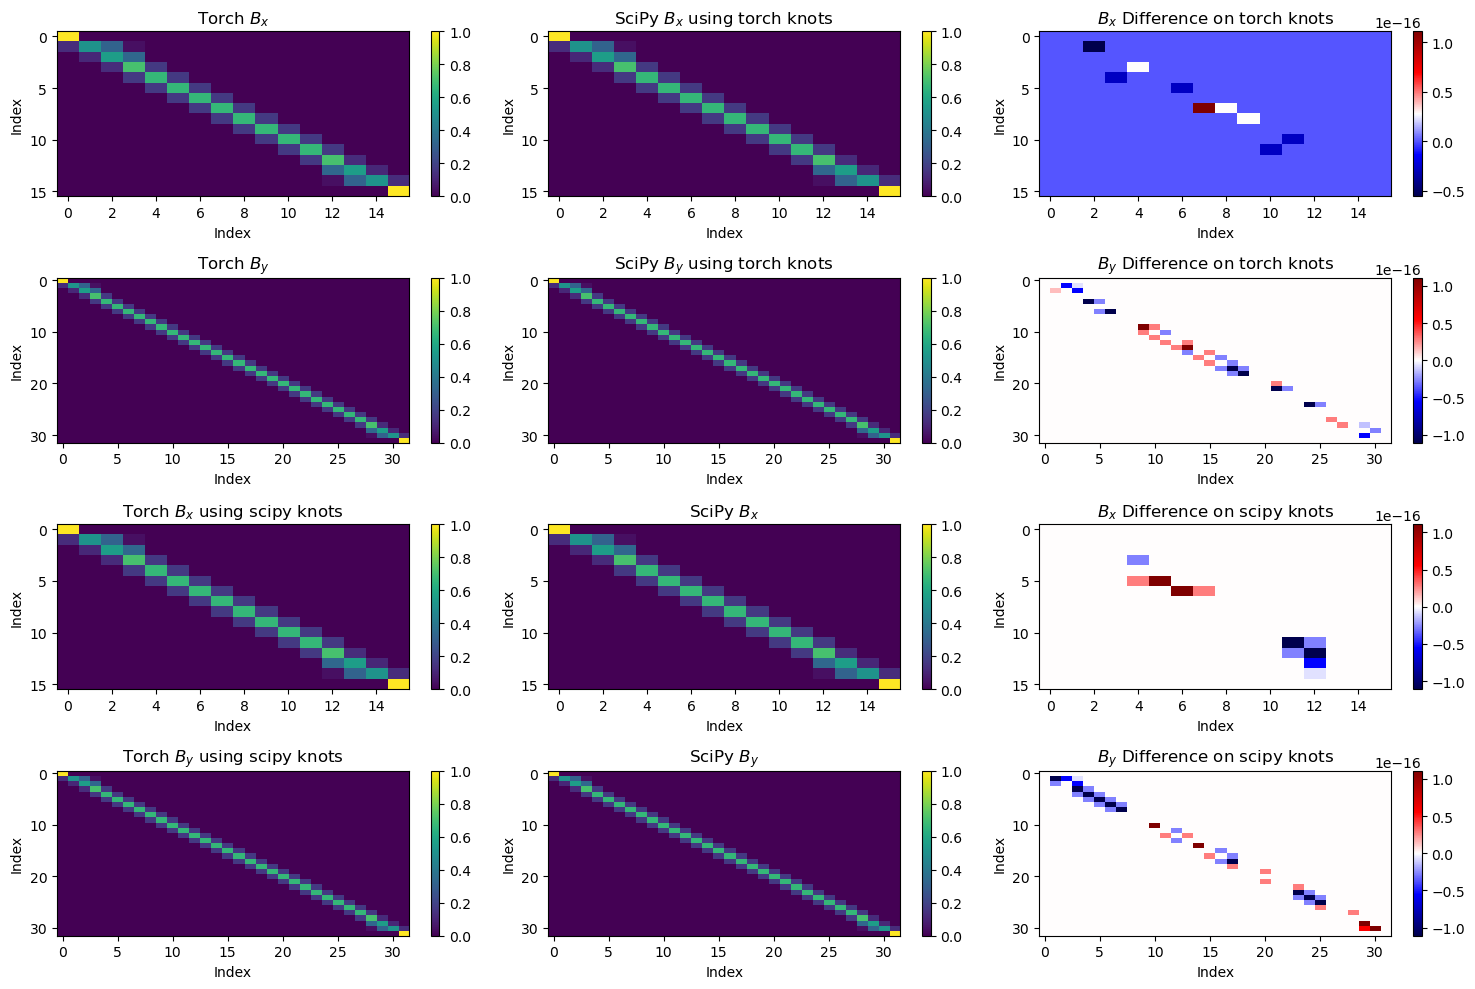

In [15]:
fig, axs = plt.subplots(4, 3, figsize=(15, 10))

# Bx torch knots 
im00 = axs[0, 0].imshow(Bx, aspect='auto')
axs[0, 0].set_title('Torch $B_x$')
fig.colorbar(im00, ax=axs[0, 0])

im01 = axs[0, 1].imshow(Bx_sci_knots_torch, aspect='auto')
axs[0, 1].set_title('SciPy $B_x$ using torch knots')
fig.colorbar(im01, ax=axs[0, 1])

im02 = axs[0, 2].imshow(Bx - Bx_sci_knots_torch, aspect='auto', cmap='seismic')
axs[0, 2].set_title('$B_x$ Difference on torch knots')
fig.colorbar(im02, ax=axs[0, 2])

# By torch knots 
im10 = axs[1, 0].imshow(By, aspect='auto')
axs[1, 0].set_title('Torch $B_y$')
fig.colorbar(im10, ax=axs[1, 0])

im11 = axs[1, 1].imshow(By_sci_knots_torch, aspect='auto')
axs[1, 1].set_title('SciPy $B_y$ using torch knots')
fig.colorbar(im11, ax=axs[1, 1])

im12 = axs[1, 2].imshow(By - By_sci_knots_torch, aspect='auto', cmap='seismic')
axs[1, 2].set_title('$B_y$ Difference on torch knots')
fig.colorbar(im12, ax=axs[1, 2])

# Bx scipy knots
im20 = axs[2, 0].imshow(Bx_knots_sci, aspect='auto')
axs[2, 0].set_title('Torch $B_x$ using scipy knots')
fig.colorbar(im20, ax=axs[2, 0])

im21 = axs[2, 1].imshow(Bx_sci, aspect='auto')
axs[2, 1].set_title('SciPy $B_x$')
fig.colorbar(im21, ax=axs[2, 1])

im22 = axs[2, 2].imshow(Bx_knots_sci - Bx_sci, aspect='auto', cmap='seismic')
axs[2, 2].set_title('$B_x$ Difference on scipy knots')
fig.colorbar(im22, ax=axs[2, 2])

# By scipy knots
im30 = axs[3, 0].imshow(By_knots_sci, aspect='auto')
axs[3, 0].set_title('Torch $B_y$ using scipy knots')
fig.colorbar(im30, ax=axs[3, 0])

im31 = axs[3, 1].imshow(By_sci, aspect='auto')
axs[3, 1].set_title('SciPy $B_y$')
fig.colorbar(im31, ax=axs[3, 1])

im32 = axs[3, 2].imshow(By_knots_sci - By_sci, aspect='auto', cmap='seismic')
axs[3, 2].set_title('$B_y$ Difference on scipy knots')
fig.colorbar(im32, ax=axs[3, 2])

# Axis labels
for ax in axs.flat:
    ax.set_xlabel('Index')
    ax.set_ylabel('Index')

plt.tight_layout()
plt.show()
